<a href="https://colab.research.google.com/github/sanjay3081/fyp/blob/main/Inception%20v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os 
import glob
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential
from keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from keras.layers import Convolution2D,Dense,MaxPool2D,Activation,Dropout,Flatten
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count
train_dir ="/content/drive/MyDrive/cotton/cotton"
test_dir="/content/drive/MyDrive/cotton/cotton"

In [4]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*")) 
test_samples=get_files(test_dir)
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

4 Classes
1713 Train images
1713 Test images


In [5]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    )
test_datagen=ImageDataGenerator(rescale=1./255)

In [6]:
input_shape=(224,224,3)
train_generator =train_datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=32)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True,target_size=(224,224),batch_size=32)

Found 1711 images belonging to 4 classes.
Found 1711 images belonging to 4 classes.


In [7]:
IMAGE_SIZE = [224, 224]
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in inception.layers:
    layer.trainable = False

87910968/87910968 [==============================] - 2s 0us/step


In [8]:
x = Flatten()(inception.output)
prediction = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=inception.input, outputs=prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [9]:
validation_generator = train_datagen.flow_from_directory(
                       test_dir,
                       target_size=(224, 224),
                       batch_size=32)

Found 1711 images belonging to 4 classes.


In [10]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history4 = model.fit(
    train_generator,
    steps_per_epoch=None,
    epochs=2,
    validation_data=validation_generator,
    validation_steps=None,
    verbose=1,
    callbacks=[ReduceLROnPlateau(monitor='val_loss', factor=0.3,patience=3, min_lr=0.000001)],
    shuffle=True)

Epoch 1/2
54/54 [==============================] - 988s 18s/step - loss: 2.6607 - accuracy: 0.7119 - val_loss: 0.3677 - val_accuracy: 0.9234 - lr: 0.0010
Epoch 2/2
54/54 [==============================] - 414s 8s/step - loss: 0.3238 - accuracy: 0.9269 - val_loss: 0.1467 - val_accuracy: 0.9603 - lr: 0.0010


In [11]:
model.save('lddinc.h5')

In [12]:
import numpy as np
from keras.models import load_model
from keras.preprocessing import image
model_inception=load_model('lddinc.h5')

1/1 [==============================] - 0s 160ms/step
fussarium_wilt


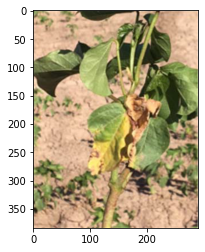

In [17]:
from tensorflow.keras.preprocessing import image
classes=list(train_generator.class_indices.keys())
def prepare(img_path):
    img = image.load_img(img_path, target_size=(224,224))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
img='/content/drive/MyDrive/cotton/cotton/fussarium_wilt/Figure-2A.png'

result_inception = model_inception.predict([prepare(img)])
disease=image.load_img(img)
plt.imshow(disease)

classresult=np.argmax(result_inception,axis=1)
print(classes[classresult[0]])